In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,015 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 드라이브연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# 차주 데이터 가져오기

In [ ]:
data_path = '/content/drive/MyDrive/kt_aivle/bigproject/data'

df = pd.read_csv(data_path+'/data_latlong.csv', encoding='cp949')
df

,num,category,T,car_type,is_freezer,vibration-free,transport_type,Departure (1),Departure (2),Departure (3),Destination (1),Destination (2),Destination (3),Destination type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude
0,46640,3,3,1,0,2,3,충청남도,당진군,송악읍,대전광역시,중구,안영동,7.0,36.904159,126.699458,36.281500,127.377800
1,46669,3,3,1,0,2,2,경기도,화성시,팔탄면,경기도,화성시,동탄면,7.0,37.162248,126.904961,NaN,NaN
2,46673,3,6,1,0,2,3,강원도,춘천시,동면,부산광역시,사상구,모라동,7.0,37.910276,127.781058,35.186980,128.989962
3,46676,5,3,1,0,2,3,대전광역시,서구,관저동,인천광역시,중구,북성동,6.0,36.303951,127.337361,37.475161,126.618491
4,46683,1,3,4,1,2,3,충청북도,진천군,광혜원면,경기도,안성시,석정동,6.0,36.993408,127.435584,37.009900,127.259400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,105113,3,6,1,0,2,3,대구광역시,남구,봉덕동,대구광역시,남구,대명동,7.0,35.845294,128.596437,35.841747,128.573555
4384,105249,5,3,1,0,2,2,충청남도,천안시 동남구,영성,서울특별시,송파구,가락,6.0,36.800017,127.151625,NaN,NaN
4385,105372,3,6,1,0,2,3,인천광역시,동구,송림,인천광역시,동구,송현,7.0,NaN,NaN,37.486851,126.642225
4386,105534,5,6,1,0,2,3,대구광역시,남구,봉덕동,대구광역시,달서구,호산동,6.0,35.845294,128.596437,35.853700,128.482300


In [ ]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2708 entries, 0 to 4387
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num                    2708 non-null   int64  
 1   category               2708 non-null   int64  
 2   T                      2708 non-null   int64  
 3   car_type               2708 non-null   int64  
 4   is_freezer             2708 non-null   int64  
 5   vibration-free         2708 non-null   int64  
 6   transport_type         2708 non-null   int64  
 7   Departure (1)          2708 non-null   object 
 8   Departure (2)          2708 non-null   object 
 9   Departure (3)          2708 non-null   object 
 10  Destination (1)        2708 non-null   object 
 11  Destination (2)        2708 non-null   object 
 12  Destination (3)        2708 non-null   object 
 13  Destination type       2708 non-null   float64
 14  Departure_latitude     2708 non-null   float64
 15  Depa

## 시 구 읍 붙이기

In [ ]:
# 각 열의 값을 이어 붙여 새로운 열 생성
df['Departure'] = df.apply(lambda row: f"{row['Departure (1)']} {row['Departure (2)']} {row['Departure (3)']}", axis=1)
df['Destination'] = df.apply(lambda row: f"{row['Destination (1)']} {row['Destination (2)']} {row['Destination (3)']}", axis=1)
df

,num,category,T,car_type,is_freezer,vibration-free,transport_type,Departure (1),Departure (2),Departure (3),Destination (1),Destination (2),Destination (3),Destination type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,46640,3,3,1,0,2,3,충청남도,당진군,송악읍,대전광역시,중구,안영동,7.0,36.904159,126.699458,36.281500,127.377800,충청남도 당진군 송악읍,대전광역시 중구 안영동
2,46673,3,6,1,0,2,3,강원도,춘천시,동면,부산광역시,사상구,모라동,7.0,37.910276,127.781058,35.186980,128.989962,강원도 춘천시 동면,부산광역시 사상구 모라동
3,46676,5,3,1,0,2,3,대전광역시,서구,관저동,인천광역시,중구,북성동,6.0,36.303951,127.337361,37.475161,126.618491,대전광역시 서구 관저동,인천광역시 중구 북성동
4,46683,1,3,4,1,2,3,충청북도,진천군,광혜원면,경기도,안성시,석정동,6.0,36.993408,127.435584,37.009900,127.259400,충청북도 진천군 광혜원면,경기도 안성시 석정동
5,46699,1,3,1,0,2,1,경상북도,안동시,송현동,서울특별시,송파구,가락동,6.0,36.576600,128.700763,37.495557,127.121786,경상북도 안동시 송현동,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,105061,7,3,1,0,2,2,충청남도,계룡시,금암,전라북도,무주군,무주,7.0,36.272767,127.246400,36.008792,127.662238,충청남도 계룡시 금암,전라북도 무주군 무주
4382,105086,5,6,1,0,2,3,대구광역시,남구,봉덕동,대구광역시,달서구,신당동,7.0,35.845294,128.596437,35.858965,128.498813,대구광역시 남구 봉덕동,대구광역시 달서구 신당동
4383,105113,3,6,1,0,2,3,대구광역시,남구,봉덕동,대구광역시,남구,대명동,7.0,35.845294,128.596437,35.841747,128.573555,대구광역시 남구 봉덕동,대구광역시 남구 대명동
4386,105534,5,6,1,0,2,3,대구광역시,남구,봉덕동,대구광역시,달서구,호산동,6.0,35.845294,128.596437,35.853700,128.482300,대구광역시 남구 봉덕동,대구광역시 달서구 호산동


In [ ]:
df.columns

Index(['num', 'category', 'T', 'car_type', 'is_freezer', 'vibration-free',
       'transport_type', 'Departure (1)', 'Departure (2)', 'Departure (3)',
       'Destination (1)', 'Destination (2)', 'Destination (3)',
       'Destination type', 'Departure_latitude', 'Departure_longitude',
       'Destination_latitude', 'Destination_longitude', 'Departure',
       'Destination'],
      dtype='object')

In [ ]:
df.drop(['Departure (1)','Departure (2)','Departure (3)', 'Destination (1)', 'Destination (2)', 'Destination (3)', 'Destination type'],axis=1,inplace=True)
df.head()

,num,category,T,car_type,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,46640,3,3,1,0,2,3,36.904159,126.699458,36.281500,127.377800,충청남도 당진군 송악읍,대전광역시 중구 안영동
2,46673,3,6,1,0,2,3,37.910276,127.781058,35.186980,128.989962,강원도 춘천시 동면,부산광역시 사상구 모라동
3,46676,5,3,1,0,2,3,36.303951,127.337361,37.475161,126.618491,대전광역시 서구 관저동,인천광역시 중구 북성동
4,46683,1,3,4,1,2,3,36.993408,127.435584,37.009900,127.259400,충청북도 진천군 광혜원면,경기도 안성시 석정동
5,46699,1,3,1,0,2,1,36.576600,128.700763,37.495557,127.121786,경상북도 안동시 송현동,서울특별시 송파구 가락동


In [ ]:
df['T'].value_counts()

3    1387
6     606
5     362
2     241
4     112
Name: T, dtype: int64

In [ ]:
# 매핑할 값 딕셔너리
ton = {2: [1, 1.4], 3: [2.5, 5], 4: 8, 5: 11, 6: 25}

import random
random.seed(0)  # 랜덤 시드 설정

def random_replace(val, ton):
    if val in ton:
        if isinstance(ton[val], list):
            return random.choice(ton[val])
        else:
            return ton[val]
    else:
        return val

df['T'] = df['T'].apply(lambda x: random_replace(x, ton))

In [ ]:
df['car_type'].loc[df['car_type']==4]

4       4
14      4
17      4
18      4
22      4
       ..
4248    4
4250    4
4259    4
4319    4
4374    4
Name: car_type, Length: 189, dtype: int64

In [ ]:
df['car_type'].loc[df['car_type']==1]

0       1
2       1
3       1
5       1
7       1
       ..
4381    1
4382    1
4383    1
4386    1
4387    1
Name: car_type, Length: 2204, dtype: int64

## 카고형 데이터 남기기

In [ ]:
df = df.loc[(df['car_type']==1) | (df['car_type']==4)]

In [1]:
df = df.reset_index(drop=True)

In [ ]:
# 조건에 따라 값 업데이트 1- 왕복, 0 - 편도, 다수통행
df.loc[df['transport_type'].isin([1, 3]), 'transport_type'] = 0
df.loc[df['transport_type'] == 2, 'transport_type'] = 1

In [ ]:
# df.to_csv('user_df.csv', index=False, encoding='cp949')

In [ ]:
user_data = df.copy()

In [ ]:
owner_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   공장주소_지번              20000 non-null  object 
 1   생산품                  20000 non-null  object 
 2   업종명                  20000 non-null  object 
 3   용도지역                 20000 non-null  object 
 4   Departure_latitude   19784 non-null  float64
 5   Departure_longitude  19784 non-null  float64
dtypes: float64(2), object(4)
memory usage: 937.6+ KB


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num                    2393 non-null   int64  
 1   category               2393 non-null   int64  
 2   T                      2393 non-null   float64
 3   car_type               2393 non-null   int64  
 4   is_freezer             2393 non-null   int64  
 5   vibration-free         2393 non-null   int64  
 6   transport_type         2393 non-null   int64  
 7   Departure_latitude     2393 non-null   float64
 8   Departure_longitude    2393 non-null   float64
 9   Destination_latitude   2393 non-null   float64
 10  Destination_longitude  2393 non-null   float64
 11  Departure              2393 non-null   object 
 12  Destination            2393 non-null   object 
dtypes: float64(5), int64(6), object(2)
memory usage: 243.2+ KB


In [ ]:
user_data.rename(columns={'vibration-free':'vibration_free'},inplace=True)

In [ ]:
user_data = user_data.drop(user_data.loc[user_data['Destination'].str.contains('제주')].index)
user_data = user_data.drop(user_data.loc[user_data['Departure'].str.contains('제주')].index)

In [ ]:
user_data = user_data.reset_index(drop=True)
user_data

,num,category,T,car_type,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,46640,3,5.0,1,0,2,0,36.904159,126.699458,36.281500,127.377800,충청남도 당진군 송악읍,대전광역시 중구 안영동
1,46673,3,25.0,1,0,2,0,37.910276,127.781058,35.186980,128.989962,강원도 춘천시 동면,부산광역시 사상구 모라동
2,46676,5,5.0,1,0,2,0,36.303951,127.337361,37.475161,126.618491,대전광역시 서구 관저동,인천광역시 중구 북성동
3,46683,1,2.5,4,1,2,0,36.993408,127.435584,37.009900,127.259400,충청북도 진천군 광혜원면,경기도 안성시 석정동
4,46699,1,5.0,1,0,2,0,36.576600,128.700763,37.495557,127.121786,경상북도 안동시 송현동,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,105061,7,5.0,1,0,2,1,36.272767,127.246400,36.008792,127.662238,충청남도 계룡시 금암,전라북도 무주군 무주
2273,105086,5,25.0,1,0,2,0,35.845294,128.596437,35.858965,128.498813,대구광역시 남구 봉덕동,대구광역시 달서구 신당동
2274,105113,3,25.0,1,0,2,0,35.845294,128.596437,35.841747,128.573555,대구광역시 남구 봉덕동,대구광역시 남구 대명동
2275,105534,5,25.0,1,0,2,0,35.845294,128.596437,35.853700,128.482300,대구광역시 남구 봉덕동,대구광역시 달서구 호산동


In [ ]:
# user_data.to_csv('user_car.csv', index=False, encoding='cp949')

In [ ]:
drop_cols = ['car_type','num','Departure', 'Destination']
new_user_data = user_data.drop(drop_cols, axis=1)
new_user_data.info()

# ,'Departure', 'Destination'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               2277 non-null   int64  
 1   T                      2277 non-null   float64
 2   is_freezer             2277 non-null   int64  
 3   vibration_free         2277 non-null   int64  
 4   transport_type         2277 non-null   int64  
 5   Departure_latitude     2277 non-null   float64
 6   Departure_longitude    2277 non-null   float64
 7   Destination_latitude   2277 non-null   float64
 8   Destination_longitude  2277 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 160.2 KB


In [ ]:
new_user_data.head(10)

,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude
0,3,5.0,0,2,0,36.904159,126.699458,36.281500,127.377800
1,3,25.0,0,2,0,37.910276,127.781058,35.186980,128.989962
2,5,5.0,0,2,0,36.303951,127.337361,37.475161,126.618491
3,1,2.5,1,2,0,36.993408,127.435584,37.009900,127.259400
4,1,5.0,0,2,0,36.576600,128.700763,37.495557,127.121786
5,3,5.0,0,2,0,37.864515,127.726137,36.764842,127.150000
6,1,5.0,0,2,0,36.355928,128.694778,37.495557,127.121786
7,1,5.0,0,2,0,35.466398,128.324538,37.495557,127.121786
8,5,1.4,0,2,0,35.988525,128.397950,37.256117,127.646263
9,3,5.0,0,2,1,37.341277,127.960247,37.867100,127.693500


# 화주 데이터 가져오기

### 대분류 코딩화

In [ ]:
data = pd.read_csv(data_path+'/data_owner2.csv', encoding='cp949')
data

,공장주소_지번,생산품,업종명,용도지역,Departure_latitude,Departure_longitude,전처리 업종명,대분류
0,경기도 파주시 광탄면 방축리 190번지,"배전반, 계장제어장치 등",공기 조화장치 제조업 외 6 종,관리지역/계획관리지역/계획관리지역/,37.814105,126.866859,공기 조화장치 제조업,제조업
1,경기도 파주시 오도동 1-1번지,금속다이케스팅기,금속 주조 및 기타 야금용 기계 제조업,관리지역/계획관리지역/계획관리지역/,37.750447,126.735875,금속 주조 및 기타 야금용 기계 제조업,제조업
2,경기도 여주시 천송동 497-3번지,도자기,가정용 및 장식용 도자기 제조업,자연환경보전지역/상수원보호구역/상수원보호구역/,37.303771,127.649988,가정용 및 장식용 도자기 제조업,도소매업
3,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,액체 여과기,액체 여과기 제조업,도시지역/공업지역/일반공업지역/,37.320491,126.728320,액체 여과기 제조업,제조업
4,충청북도 청주시 흥덕구 현암동 19-6번지,특수필름관련장비,산업처리공정 제어장비 제조업,도시지역/녹지지역/자연녹지지역/,36.589369,127.395426,산업처리공정 제어장비 제조업,제조업
...,...,...,...,...,...,...,...,...
19995,전라북도 김제시 백산면 부거리 1579-1번지,"양돈케이지, 환풍기",그 외 기타 플라스틱 제품 제조업 외 1 종,도시지역/공업지역/일반공업지역/,35.845245,126.880658,그 외 기타 플라스틱 제품 제조업,제조업
19996,경기도 포천시 내촌면 음현리 10-21,스폰지,그외 기타 플라스틱 제품 제조업,농림지역/준보전산지지역/준보전산지지/,37.777059,127.241123,그외 기타 플라스틱 제품 제조업,제조업
19997,경기도 화성시 비봉면 양노리 669-5번지,차량용 냉동기기,산업용 냉장 및 냉동 장비 제조업 외 1 종,관리지역/계획관리지역/계획관리지역/,37.219241,126.855075,산업용 냉장 및 냉동 장비 제조업,제조업
19998,경기도 용인시처인구 모현읍 초부리 46번지,건축용목제품,기타 건축용 나무제품 제조업 외 1 종,관리지역/관리지역/관리지역/,37.314786,127.234982,기타 건축용 나무제품 제조업,건설업


In [ ]:
big_category_mapping = {'농림축산업':1,
        '광업':2,
        '제조업':3,
        '건설업':4,
        '도소매업':5,
        '숙박 및 서비스업':6,
        '기타 서비스업':7,
        '공공기관':8}

# 매핑 적용
data['수치값'] = data['대분류'].map(big_category_mapping)
data.drop('대분류', axis = 1, inplace=True)

In [ ]:
data.head()

,공장주소_지번,생산품,업종명,용도지역,Departure_latitude,Departure_longitude,전처리 업종명,수치값
0,경기도 파주시 광탄면 방축리 190번지,"배전반, 계장제어장치 등",공기 조화장치 제조업 외 6 종,관리지역/계획관리지역/계획관리지역/,37.814105,126.866859,공기 조화장치 제조업,3
1,경기도 파주시 오도동 1-1번지,금속다이케스팅기,금속 주조 및 기타 야금용 기계 제조업,관리지역/계획관리지역/계획관리지역/,37.750447,126.735875,금속 주조 및 기타 야금용 기계 제조업,3
2,경기도 여주시 천송동 497-3번지,도자기,가정용 및 장식용 도자기 제조업,자연환경보전지역/상수원보호구역/상수원보호구역/,37.303771,127.649988,가정용 및 장식용 도자기 제조업,5
3,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,액체 여과기,액체 여과기 제조업,도시지역/공업지역/일반공업지역/,37.320491,126.728320,액체 여과기 제조업,3
4,충청북도 청주시 흥덕구 현암동 19-6번지,특수필름관련장비,산업처리공정 제어장비 제조업,도시지역/녹지지역/자연녹지지역/,36.589369,127.395426,산업처리공정 제어장비 제조업,3


## 테스트용 화주 생성 (테스트를 위한 컬럼 맞추기)

In [ ]:
np.random.seed(42)  # 랜덤 값의 재현성을 위한 시드 설정
data['T'] = np.random.choice([1, 1.4, 2.5, 5, 8, 11, 25], size=len(data))
data.head()

,공장주소_지번,생산품,업종명,용도지역,Departure_latitude,Departure_longitude,전처리 업종명,수치값,T
0,경기도 파주시 광탄면 방축리 190번지,"배전반, 계장제어장치 등",공기 조화장치 제조업 외 6 종,관리지역/계획관리지역/계획관리지역/,37.814105,126.866859,공기 조화장치 제조업,3,25.0
1,경기도 파주시 오도동 1-1번지,금속다이케스팅기,금속 주조 및 기타 야금용 기계 제조업,관리지역/계획관리지역/계획관리지역/,37.750447,126.735875,금속 주조 및 기타 야금용 기계 제조업,3,5.0
2,경기도 여주시 천송동 497-3번지,도자기,가정용 및 장식용 도자기 제조업,자연환경보전지역/상수원보호구역/상수원보호구역/,37.303771,127.649988,가정용 및 장식용 도자기 제조업,5,8.0
3,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,액체 여과기,액체 여과기 제조업,도시지역/공업지역/일반공업지역/,37.320491,126.728320,액체 여과기 제조업,3,25.0
4,충청북도 청주시 흥덕구 현암동 19-6번지,특수필름관련장비,산업처리공정 제어장비 제조업,도시지역/녹지지역/자연녹지지역/,36.589369,127.395426,산업처리공정 제어장비 제조업,3,2.5


In [ ]:
owner_data.loc[data['업종명'].str.contains('냉동|냉장|수산|정육|고기|아이스크림|빙과|김치|빵|도시락|떡|식사|음료|두부|식품|과실|채소')]

,공장주소_지번,생산품,업종명,용도지역,Departure_latitude,Departure_longitude
25,경상북도 포항시북구 흥해읍 남송리 3번지 한동대 창업보육센터 F102호,영양죽,도시락류 제조업 외 1 종,도시지역/녹지지역/자연녹지지역/,36.103225,129.388843
107,충청북도 음성군 대소면 삼정리 311-1번지,"농산물 저온저장고, 냉동기계",산업용 냉장 및 냉동 장비 제조업,관리지역/계획관리지역/계획관리지역/,36.947582,127.496080
153,대구광역시 달서구 호산동 711번지 2동 4층 421,이종물질캡충진,기타 비알코올 음료 제조업,도시지역/공업지역/일반공업지역/,35.840362,128.488991
181,전라북도 군산시 산북동 322-10번지,냉동수산물,수산동물 냉동품 제조업,도시지역/녹지지역/생산녹지지역/,35.957673,126.670400
198,경기도 군포시 당정동 364-11번지,식품첨가물(향료),기타 식품 첨가물 제조업,도시지역/공업지역/일반공업지역/,37.353880,126.957619
...,...,...,...,...,...,...
19885,충청북도 음성군 삼성면 선정리 191-5번지,"조곡류가공품, 식품제조업,도시락,냉동피자",기타 식사용 가공처리 조리식품 제조업 외 4 종,관리지역/계획관리지역/계획관리지역/,36.990505,127.504701
19887,충청남도 서천군 비인면 칠지리 159번지,떡류,떡류 제조업,관리지역/계획관리지역/계획관리지역/,36.150584,126.585128
19894,경기도 파주시 파주읍 봉암리 207-4번지,"과실,채소김치",김치류 제조업 외 1 종,관리지역/계획관리지역/계획관리지역/,37.812713,126.801498
19944,강원도 횡성군 횡성읍 묵계리 334-1번지 16동 1층,"빵류, 케익",빵류 제조업,관리지역/계획관리지역/계획관리지역/지구단위2종수립지구,37.471389,127.981485


In [ ]:
keywords = ['냉동', '냉장', '수산', '정육', '고기', '아이스크림', '빙과', '김치', '빵', '도시락', '떡', '식사', '음료', '두부', '식품', '과실', '채소']

data['is_freezer'] = data['업종명'].str.contains('|'.join(keywords)).astype(int)

In [ ]:
data['num'] = data.index + 1

In [ ]:
# 무진동/냉장

# 'vibration_free' 열의 값과 각각의 비율
values = [1, 2]
probs = [92/2393, 2301/2393]  # 92/(2301+92)와 2301/(2301+92)

np.random.seed(42)

# 'vibration_free' 열 추가
data['vibration_free'] = np.random.choice(values, size=len(data), p=probs)

In [ ]:
# 'transport_type' 열의 값과 각각의 비율
values = [0,1]
probs = [1560/2393, 833/2393]

np.random.seed(42)

# 'transport_type' 열 추가
data['transport_type'] = np.random.choice(values, size=len(data), p=probs)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   공장주소_지번              20000 non-null  object 
 1   생산품                  20000 non-null  object 
 2   업종명                  20000 non-null  object 
 3   용도지역                 20000 non-null  object 
 4   Departure_latitude   19784 non-null  float64
 5   Departure_longitude  19784 non-null  float64
 6   전처리 업종명              20000 non-null  object 
 7   수치값                  20000 non-null  int64  
 8   T                    20000 non-null  float64
 9   is_freezer           20000 non-null  int64  
 10  num                  20000 non-null  int64  
 11  vibration_free       20000 non-null  int64  
 12  transport_type       20000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
data.head()

,공장주소_지번,생산품,업종명,용도지역,Departure_latitude,Departure_longitude,전처리 업종명,수치값,T,is_freezer,num,vibration_free,transport_type
0,경기도 파주시 광탄면 방축리 190번지,"배전반, 계장제어장치 등",공기 조화장치 제조업 외 6 종,관리지역/계획관리지역/계획관리지역/,37.814105,126.866859,공기 조화장치 제조업,3,25.0,0,1,2,0
1,경기도 파주시 오도동 1-1번지,금속다이케스팅기,금속 주조 및 기타 야금용 기계 제조업,관리지역/계획관리지역/계획관리지역/,37.750447,126.735875,금속 주조 및 기타 야금용 기계 제조업,3,5.0,0,2,2,1
2,경기도 여주시 천송동 497-3번지,도자기,가정용 및 장식용 도자기 제조업,자연환경보전지역/상수원보호구역/상수원보호구역/,37.303771,127.649988,가정용 및 장식용 도자기 제조업,5,8.0,0,3,2,1
3,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,액체 여과기,액체 여과기 제조업,도시지역/공업지역/일반공업지역/,37.320491,126.728320,액체 여과기 제조업,3,25.0,0,4,2,0
4,충청북도 청주시 흥덕구 현암동 19-6번지,특수필름관련장비,산업처리공정 제어장비 제조업,도시지역/녹지지역/자연녹지지역/,36.589369,127.395426,산업처리공정 제어장비 제조업,3,2.5,0,5,2,0


In [ ]:
data=data[['num','수치값','T','is_freezer','vibration_free','transport_type','Departure_latitude','Departure_longitude','공장주소_지번']]

In [ ]:
data.rename(columns={'수치값':'category', '공장주소_지번':'Departure'},inplace=True)
data.head()

<ipython-input-346-024594aab56f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'수치값':'category', '공장주소_지번':'Departure'},inplace=True)


,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Departure
0,1,3,25.0,0,2,0,37.814105,126.866859,경기도 파주시 광탄면 방축리 190번지
1,2,3,5.0,0,2,1,37.750447,126.735875,경기도 파주시 오도동 1-1번지
2,3,5,8.0,0,2,1,37.303771,127.649988,경기도 여주시 천송동 497-3번지
3,4,3,25.0,0,2,0,37.320491,126.728320,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호
4,5,3,2.5,0,2,0,36.589369,127.395426,충청북도 청주시 흥덕구 현암동 19-6번지


In [ ]:
user_data.head()

,num,category,T,car_type,is_freezer,vibration-free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,46640,3,5.0,1,0,2,0,36.904159,126.699458,36.281500,127.377800,충청남도 당진군 송악읍,대전광역시 중구 안영동
1,46673,3,25.0,1,0,2,0,37.910276,127.781058,35.186980,128.989962,강원도 춘천시 동면,부산광역시 사상구 모라동
2,46676,5,5.0,1,0,2,0,36.303951,127.337361,37.475161,126.618491,대전광역시 서구 관저동,인천광역시 중구 북성동
3,46683,1,2.5,4,1,2,0,36.993408,127.435584,37.009900,127.259400,충청북도 진천군 광혜원면,경기도 안성시 석정동
4,46699,1,5.0,1,0,2,0,36.576600,128.700763,37.495557,127.121786,경상북도 안동시 송현동,서울특별시 송파구 가락동


In [ ]:
# 'A', 'B' 열을 랜덤하게 선택하고, df2의 행 수만큼 뽑습니다.
random_rows = user_data[['Destination_latitude', 'Destination_longitude', 'Destination']].sample(n=len(data), replace=True)

# 인덱스를 리셋합니다.
random_rows.reset_index(drop=True, inplace=True)

# df2에 랜덤하게 뽑힌 행을 붙입니다.
data = pd.concat([data, random_rows], axis=1)
data.head()

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Departure,Destination_latitude,Destination_longitude,Destination
0,1,3,25.0,0,2,0,37.814105,126.866859,경기도 파주시 광탄면 방축리 190번지,37.349301,126.746051,경기도 시흥시 정왕동
1,2,3,5.0,0,2,1,37.750447,126.735875,경기도 파주시 오도동 1-1번지,37.385215,127.287969,경기도 광주시 초월읍
2,3,5,8.0,0,2,1,37.303771,127.649988,경기도 여주시 천송동 497-3번지,35.186776,126.921600,광주광역시 북구 문흥동
3,4,3,25.0,0,2,0,37.320491,126.728320,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,37.495557,127.121786,서울특별시 송파구 가락동
4,5,3,2.5,0,2,0,36.589369,127.395426,충청북도 청주시 흥덕구 현암동 19-6번지,37.534700,126.906500,서울특별시 영등포구 당산


In [ ]:
data = data[['num',	'category',	'T', 'is_freezer', 'vibration_free', 'transport_type', 'Departure_latitude', 'Departure_longitude', 'Destination_latitude', 'Destination_longitude', 'Departure', 'Destination']]

In [ ]:
data = data.drop(data.loc[data['Destination'].str.contains('제주')].index)

In [ ]:
data = data.dropna().reset_index(drop=True)
data

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,1,3,25.0,0,2,0,37.814105,126.866859,37.349301,126.746051,경기도 파주시 광탄면 방축리 190번지,경기도 시흥시 정왕동
1,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
2,3,5,8.0,0,2,1,37.303771,127.649988,35.186776,126.921600,경기도 여주시 천송동 497-3번지,광주광역시 북구 문흥동
3,4,3,25.0,0,2,0,37.320491,126.728320,37.495557,127.121786,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,서울특별시 송파구 가락동
4,5,3,2.5,0,2,0,36.589369,127.395426,37.534700,126.906500,충청북도 청주시 흥덕구 현암동 19-6번지,서울특별시 영등포구 당산
...,...,...,...,...,...,...,...,...,...,...,...,...
18814,19996,3,5.0,0,2,1,35.845245,126.880658,37.495557,127.121786,전라북도 김제시 백산면 부거리 1579-1번지,서울특별시 송파구 가락동
18815,19997,3,11.0,0,2,0,37.777059,127.241123,37.518394,126.737573,경기도 포천시 내촌면 음현리 10-21,인천광역시 부평구 삼산동
18816,19998,3,1.4,1,2,0,37.219241,126.855075,35.142542,129.071319,경기도 화성시 비봉면 양노리 669-5번지,부산광역시 남구 문현동
18817,19999,4,8.0,0,2,0,37.314786,127.234982,37.006217,127.269800,경기도 용인시처인구 모현읍 초부리 46번지,경기도 안성시 서인동


In [ ]:
# data.to_csv('company.csv', index=False, encoding='cp949')

# KPrototypes 모델

In [ ]:
!pip install kmodes

## 차주데이터로 모델링

In [ ]:
from sklearn.cluster import KMeans # K개의 클러스터로 분류하는 알고리즘
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=14, init='Huang', verbose=2, random_state=42)
clusters = kproto.fit_predict(new_user_data, categorical=[0,2,3,4])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
In

In [ ]:
import pickle

# kproto 모델 저장하기
with open('kproto_model.pkl', 'wb') as f:
    pickle.dump(kproto, f)

In [ ]:
with open('clusters_model.pkl', 'wb') as f:
    pickle.dump(clusters, f)

In [ ]:
# 결과 확인
print(kproto.cluster_centroids_)

[[  8.          35.85435963 127.92785966  35.37801267 128.43465323
    3.           0.           2.           0.        ]
 [  2.38509317  35.59931478 127.91338506  37.38723678 127.14464654
    1.           0.           2.           0.        ]
 [ 11.          35.32066894 128.22994042  37.19852337 127.23562954
    3.           0.           2.           0.        ]
 [ 11.          35.33691478 128.92327902  35.488716   128.67996308
    3.           0.           2.           0.        ]
 [ 25.          36.21635169 127.80698664  36.46387617 127.74550541
    3.           0.           2.           0.        ]
 [  5.          35.46523256 127.74464905  37.10495508 127.0944792
    5.           0.           2.           0.        ]
 [ 11.          37.24819154 127.28274108  37.24864528 127.32230739
    3.           0.           2.           0.        ]
 [  5.          37.44342857 127.36779093  37.33867213 127.26804588
    5.           0.           2.           0.        ]
 [ 11.          36.787704

In [ ]:
from sklearn.manifold import TSNE # 차원축소 알고리즘
from sklearn.cluster import DBSCAN # 특정 공간 내 데이터 밀도 차이를 이용해 클러스터를 구분

tsne = TSNE(n_components=2, random_state=42) # 데이터를 2차원으로 축소
X_reduced_tsne = tsne.fit_transform(new_user_data)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

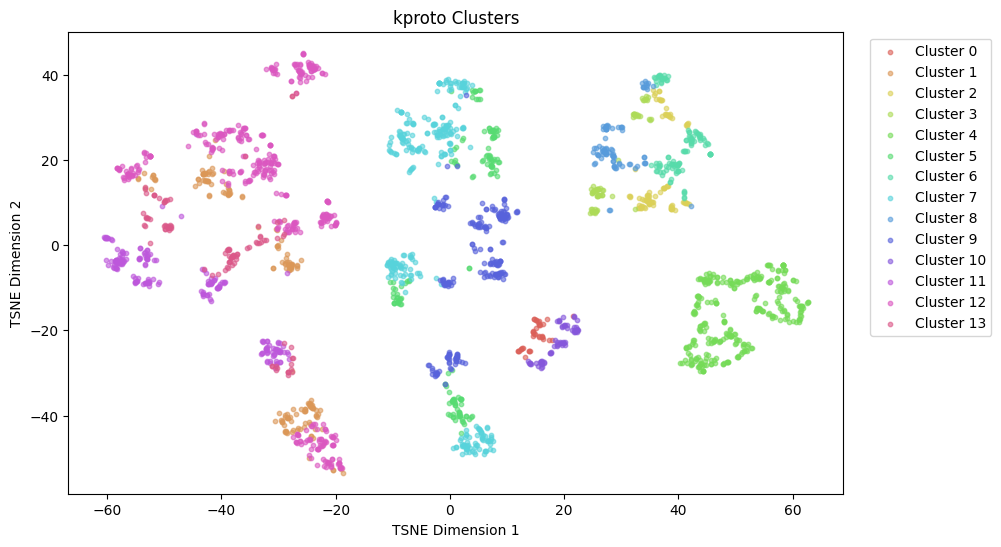

In [ ]:
# # kproto 모델로부터 예측된 레이블
# labels = kproto.labels_

# # 데이터프레임에 레이블 추가
# X_reduced_tsne_labeled = np.column_stack([X_reduced_tsne, labels])

# # 군집 별로 데이터 분리
# cluster_data = [X_reduced_tsne_labeled[X_reduced_tsne_labeled[:, -1] == cluster] for cluster in range(len(set(kproto.labels_)))]


# # 각 군집별 그래프 그리기
# plt.figure(figsize=(10, 6))
# for cluster, data in enumerate(cluster_data):
#     plt.scatter(data[:, 0], data[:, 1], cmap="Paired", alpha=0.7, s=10)
# # , label=f'Cluster {cluster}'
# plt.title('kproto Clusters')
# plt.xlabel('TSNE Dimension 1')
# plt.ylabel('TSNE Dimension 2')
# plt.legend()
# plt.show()


# labels = kproto.labels_

# # 데이터프레임에 레이블 추가
# X_reduced_tsne_labeled = np.column_stack([X_reduced_tsne, labels])

# # 군집 별로 데이터 분리
# cluster_data = [X_reduced_tsne_labeled[X_reduced_tsne_labeled[:, -1] == cluster] for cluster in range(len(set(labels)))]

# # 각 군집별 그래프 그리기
# plt.figure(figsize=(10, 6))
# for cluster, data in enumerate(cluster_data):
#     plt.scatter(data[:, 0], data[:, 1], cmap="viridis", alpha=0.6, s=10, label=f'Cluster {cluster}')
# # , label=f'Cluster {cluster}'
# plt.title('kproto Clusters')
# plt.xlabel('TSNE Dimension 1')
# plt.ylabel('TSNE Dimension 2')
# plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# plt.grid(False)
# plt.show()

import seaborn as sns

labels = kproto.labels_

# 데이터프레임에 레이블 추가
X_reduced_tsne_labeled = np.column_stack([X_reduced_tsne, labels])

# 군집 별로 데이터 분리
cluster_data = [X_reduced_tsne_labeled[X_reduced_tsne_labeled[:, -1] == cluster] for cluster in range(len(set(labels)))]

# 색상 팔레트 설정 (필요한 만큼의 색상을 생성)
palette = sns.color_palette("hls", len(cluster_data))

# 각 군집별 그래프 그리기
plt.figure(figsize=(10, 6))
for cluster, data in enumerate(cluster_data):
    plt.scatter(data[:, 0], data[:, 1], color=palette[cluster], alpha=0.6, s=10, label=f'Cluster {cluster}')

plt.title('kproto Clusters')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(False)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# 예시 데이터와 군집 레이블
data = new_user_data  # 여기에는 군집화된 데이터가 들어갑니다.
labels = kproto.labels_  # 각 데이터 포인트의 군집 레이블이 들어갑니다.

# 실루엣 계수 계산
silhouette_avg = silhouette_score(data, labels)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.28065881224876077


In [ ]:
for i in set(labels):
    print(i, ": ", len(new_user_data[labels==i]), "개")

0 :  38 개
1 :  161 개
2 :  88 개
3 :  63 개
4 :  317 개
5 :  152 개
6 :  109 개
7 :  293 개
8 :  85 개
9 :  206 개
10 :  67 개
11 :  189 개
12 :  409 개
13 :  100 개


## 화주 test데이터 넣기

In [ ]:
new_customers = data.copy()
new_customers.head()

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,1,3,25.0,0,2,0,37.814105,126.866859,37.349301,126.746051,경기도 파주시 광탄면 방축리 190번지,경기도 시흥시 정왕동
1,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
2,3,5,8.0,0,2,1,37.303771,127.649988,35.186776,126.921600,경기도 여주시 천송동 497-3번지,광주광역시 북구 문흥동
3,4,3,25.0,0,2,0,37.320491,126.728320,37.495557,127.121786,경기도 시흥시 정왕동 2101-8번지 (주)대진철구강업 시화단지 3마 508호,서울특별시 송파구 가락동
4,5,3,2.5,0,2,0,36.589369,127.395426,37.534700,126.906500,충청북도 청주시 흥덕구 현암동 19-6번지,서울특별시 영등포구 당산


In [ ]:
new_customers.shape

(18819, 12)

In [ ]:
customer_clusters = [[] for _ in range(len(set(kproto.labels_)))]

# 새로운 화주들이 new_customers라는 DataFrame에 저장되어 있다고 가정합니다.
for idx, new_customer in new_customers.iterrows():
    # 새로운 화주 데이터를 K-Prototypes 모델에 넣어 해당 데이터가 어떤 군집에 속하는지 알아냅니다.
    customer = pd.DataFrame([new_customer])
    customer.drop(['num','Departure','Destination'],axis=1, inplace=True)

    # new_customer는 Series 형태이므로 DataFrame으로 변환해줍니다.
    cluster_label = kproto.predict(customer, categorical=[0,2,3,4]) #1

    # 해당 군집에 새롭게 화주를 추가합니다.
    customer_clusters[cluster_label[0]].append(new_customer['num'])

In [ ]:
for i,j in enumerate(customer_clusters):
    print('cluster_label',i,' : ',j)

cluster_label 0  :  [3, 6, 7, 14, 51, 107, 135, 157, 187, 192, 200, 203, 265, 271, 373, 395, 401, 419, 420, 423, 431, 492, 505, 511, 522, 537, 543, 556, 561, 580, 620, 631, 632, 637, 644, 657, 662, 667, 720, 726, 748, 759, 779, 791, 818, 872, 874, 876, 877, 880, 884, 893, 910, 917, 922, 930, 942, 943, 1005, 1006, 1014, 1038, 1040, 1044, 1045, 1051, 1054, 1075, 1082, 1107, 1116, 1136, 1149, 1156, 1158, 1161, 1203, 1226, 1233, 1238, 1255, 1271, 1280, 1296, 1323, 1334, 1335, 1354, 1357, 1359, 1363, 1419, 1420, 1433, 1471, 1502, 1541, 1589, 1601, 1606, 1652, 1658, 1688, 1707, 1740, 1749, 1765, 1768, 1793, 1833, 1836, 1849, 1856, 1861, 1873, 1878, 1888, 1899, 1901, 1910, 1918, 1921, 1923, 1946, 1958, 1981, 1989, 1993, 1995, 2001, 2010, 2019, 2023, 2033, 2050, 2055, 2079, 2110, 2133, 2149, 2152, 2158, 2257, 2330, 2332, 2349, 2350, 2364, 2377, 2410, 2434, 2440, 2467, 2471, 2491, 2497, 2507, 2568, 2569, 2582, 2585, 2591, 2600, 2618, 2644, 2651, 2665, 2679, 2685, 2712, 2718, 2736, 2751, 2767, 2

In [ ]:
# 화주

# customer_clusters = [[] for _ in range(len(set(kproto.labels_)))]

# new_customers_features = {
#     'num':100001,
#     'category' : 3,
#     'T' : 5.0,
#     'is_freezer' : 1,
#     'vibration_free' : 2,
#     'transport_type' : 1,
#     'Departure_latitude' : 37.814105,
#     'Departure_longitude' : 126.866859,
#     'Destination_latitude' : 36.589369,
#     'Destination_longitude' : 127.39542,
#     'Departure': '경기도 파주시 광탄면',
#     'Destination': '충청북도 청주시 흥덕구'
# }
# new_customers = pd.DataFrame([new_customers_features])

# # 새로운 화주들이 new_customers라는 DataFrame에 저장되어 있다고 가정합니다.
# for idx, new_customer in new_customers.iterrows():
#     # 새로운 화주 데이터를 K-Prototypes 모델에 넣어 해당 데이터가 어떤 군집에 속하는지 알아냅니다.
#     customer = pd.DataFrame([new_customer])
#     customer.drop(['num','Departure','Destination'],axis=1, inplace=True)

#     # new_customer는 Series 형태이므로 DataFrame으로 변환해줍니다.
#     cluster_label = kproto.predict(customer, categorical=[0,1,2,3,4])

#     # 해당 군집에 새롭게 화주를 추가합니다.
#     customer_clusters[cluster_label[0]].append(new_customer['num'])

#     # 해당 군집의 화주 리스트를 보여줍니다.
#     print(f"Cluster {cluster_label[0]}:")
#     print(customer_clusters[cluster_label[0]])


# 선호지역1 : 경기도 파주시 광탄면
# 선호지역2 : 충청북도 청주시 흥덕구

## 차주데이터로 추천 받기

In [ ]:
new_driver_features = {
    'num': 3000,
    'category' : 3,
    'T' : 5.0,
    'is_freezer' : 0,
    'vibration_free' : 2,
    'transport_type' : 0,
    'Departure_latitude' : 37.497063718531,
    'Departure_longitude' : 127.12208802459,
    'Destination_latitude' : 36.3297322,
    'Destination_longitude' : 127.4281445,
    'Departure': '서울특별시 송파구 가락동',
    'Destination': '대전광역시 중구 은행동',
    'distance':1 #장거리
}
new_driver = pd.DataFrame([new_driver_features])

driver = new_driver.drop(['num','Departure','Destination','distance'],axis=1)
kproto.predict(driver, categorical=[0,2,3,4]) #1

array([7], dtype=uint16)

In [ ]:
# new_driver_features = {
#     'num': 3000,
#     'category' : 3,
#     'T' : 5.0,
#     'is_freezer' : 0,
#     'vibration_free' : 2,
#     'transport_type' : 0,
#     'Departure_latitude' : 37.497063718531,
#     'Departure_longitude' : 127.12208802459,
#     'Destination_latitude' : 36.982943,
#     'Destination_longitude' : 126.885150,
#     'Departure': '서울특별시 송파구 가락동',
#     'Destination': '경기도 평택시 포승읍'
# }
# new_driver = pd.DataFrame([new_driver_features])

# driver = new_driver.drop(['num','Departure','Destination'],axis=1)
# kproto.predict(driver, categorical=[0,2,3,4]) # 1

array([7], dtype=uint16)

In [ ]:
kproto

KPrototypes(gamma=1.1457809389342635, init='Huang', n_clusters=14,
            random_state=42, verbose=2)

In [ ]:
# df = pd.merge(new_user_data[labels==4], user_data[['Departure', 'Destination']].iloc[new_user_data[labels==4].index],
#          left_index=True, right_index=True)
# df

,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,3,5.0,0,2,0,36.904159,126.699458,36.281500,127.377800,충청남도 당진군 송악읍,대전광역시 중구 안영동
114,3,2.5,0,2,0,36.742323,127.454483,36.664665,127.375613,충청북도 청주시 청원구 오창읍,충청북도 청주시 흥덕구 옥산면
139,3,11.0,0,2,0,36.856949,127.132950,37.011578,127.917004,충청남도 천안시 서북구 업성동,충청북도 충주시 용탄동
142,1,25.0,0,2,0,36.824226,127.955298,37.039718,127.129521,충청북도 괴산군 장연면,경기도 안성시 원곡면
149,3,1.0,0,2,0,36.975350,127.215280,37.256117,127.646263,경기도 안성시 미양면,경기도 여주군 점봉동
...,...,...,...,...,...,...,...,...,...,...,...
2218,3,25.0,1,1,0,37.602026,127.152210,36.618824,127.416825,경기도 남양주시 도농동,충청북도 청주시 흥덕구 강서동
2227,5,25.0,0,2,0,37.560675,127.080038,36.384082,127.350227,서울특별시 광진구 중곡동,대전광역시 유성구 신성동
2257,5,5.0,1,2,0,37.235507,127.279802,36.386796,127.307906,경기도 용인시 처인구 양지면,대전광역시 유성구 노은3동
2265,3,2.5,0,2,1,37.463985,126.650287,36.486540,127.424182,인천광역시 남구 숭의,충청북도 청주시 서원구 현도


In [ ]:
df = pd.DataFrame()

for i in customer_clusters[7]:
    temp_df = new_customers[new_customers['num'] == i]
    df = pd.concat([df, temp_df], ignore_index=True)

In [ ]:
df

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동
1152,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법
1153,19914,3,5.0,0,2,0,37.911660,127.031693,37.495557,127.121786,경기도 동두천시 상패동 435번지,서울특별시 송파구 가락동
1154,19927,3,5.0,0,2,1,37.353462,126.953194,35.870393,128.701506,경기도 군포시 당정동 323-1번지 4층 407호,대구광역시 동구 안심1동


In [ ]:
# df_f = df.loc[(df['is_freezer']==new_driver['is_freezer'].values[0]) & (df['T']==new_driver['T'].values[0])]
# df_f

In [ ]:
df_f = df.loc[(df['is_freezer']==new_driver['is_freezer'].values[0]) & (df['T']==new_driver['T'].values[0]) & (df['vibration_free']==new_driver['vibration_free'].values[0])]
df_f

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동
1151,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동
1152,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법
1153,19914,3,5.0,0,2,0,37.911660,127.031693,37.495557,127.121786,경기도 동두천시 상패동 435번지,서울특별시 송파구 가락동


## 현재 차주 위치

In [ ]:
# 경기도 성남시 분당구 정자동 153
# 37.360343510097
# 127.11000482191

In [ ]:
!pip install haversine

In [ ]:
# 현재위치에서 출발지까지의 거리함수

from haversine import haversine

current_lat_col = 37.360343510097
current_lon_col = 127.11000482191

def calculate_haversine_distance(df, start_lat_col, start_lon_col, current_lat_col, current_lon_col):

    # Apply haversine function to each row
    distances = df.apply(lambda row: haversine((row[start_lat_col], row[start_lon_col]),
                                               (current_lat_col, current_lon_col)), axis=1)
    return distances

# 위에서 정의한 함수를 사용하여 haversine 거리 계산
df_f['Haversine_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', current_lat_col, current_lon_col)

# 결과 확인
df_f

<ipython-input-39-a9302fa94073>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Haversine_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', current_lat_col, current_lon_col)


,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination,Haversine_Distance
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍,54.491164
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동,8.707023
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동,32.723897
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동,50.576344
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동,56.866203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동,101.971424
1151,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동,39.958438
1152,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법,54.719281
1153,19914,3,5.0,0,2,0,37.911660,127.031693,37.495557,127.121786,경기도 동두천시 상패동 435번지,서울특별시 송파구 가락동,61.690260


In [ ]:


from haversine import haversine

def calculate_haversine_distance(df, start_lat_col, start_lon_col, current_lat_col, current_lon_col):

    # Apply haversine function to each row
    distances = df.apply(lambda row: haversine((row[start_lat_col], row[start_lon_col]),
                                               (row[current_lat_col], row[current_lon_col])), axis=1)
    return distances

# 위에서 정의한 함수를 사용하여 haversine 거리 계산
df_f['differ_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 'Destination_latitude', 'Destination_longitude')

# 결과 확인
df_f

<ipython-input-40-31b30317771e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['differ_Distance'] = calculate_haversine_distance(df_f, 'Departure_latitude', 'Departure_longitude', 'Destination_latitude', 'Destination_longitude')


,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination,Haversine_Distance,differ_Distance
0,2,3,5.0,0,2,1,37.750447,126.735875,37.385215,127.287969,경기도 파주시 오도동 1-1번지,경기도 광주시 초월읍,54.491164,63.380438
1,15,3,5.0,0,2,0,37.300506,127.046486,37.470245,126.897041,경기도 수원시 영통구 이의동 1248-3번지 (에이스광교타워1)212호,서울특별시 금천구 독산동,8.707023,23.034173
2,20,3,5.0,0,2,0,37.066964,127.139100,37.452269,126.884897,경기도 안성시 원곡면 산하리 281-8번지,경기도 광명시 소하동,32.723897,48.391266
3,27,3,5.0,0,2,0,37.680282,126.702383,37.495557,127.121786,경기도 고양시 일산서구 구산동 1190-1번지,서울특별시 송파구 가락동,50.576344,42.279622
4,31,3,5.0,0,2,0,37.667073,126.594104,37.495557,127.121786,경기도 김포시 대곶면 거물대리 373-4번지,서울특별시 송파구 가락동,56.866203,50.258815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,19870,3,5.0,0,2,0,36.444733,127.045768,37.495557,127.121786,충청남도 공주시 우성면 보흥리 909번지,서울특별시 송파구 가락동,101.971424,117.041398
1151,19882,3,5.0,0,2,1,37.230916,126.688597,37.208943,127.060275,경기도 화성시 송산면 마산리 290-29번지,경기도 화성시 능동,39.958438,33.001419
1152,19911,3,5.0,0,2,0,37.842546,126.986047,37.222946,127.424414,경기도 양주시 광적면 덕도리 47-6번지,경기도 이천시 호법,54.719281,78.999038
1153,19914,3,5.0,0,2,0,37.911660,127.031693,37.495557,127.121786,경기도 동두천시 상패동 435번지,서울특별시 송파구 가락동,61.690260,46.942531


In [ ]:
if new_driver_features['distance']==1:
    df_f = df_f[df_f['differ_Distance']>=80]
else:
    df_f = df_f[df_f['differ_Distance']<80]


In [ ]:
df_f = df_f.sort_values('Haversine_Distance')
df_f[:10]

,num,category,T,is_freezer,vibration_free,transport_type,Departure_latitude,Departure_longitude,Destination_latitude,Destination_longitude,Departure,Destination,Haversine_Distance,differ_Distance
446,7666,3,5.0,0,2,0,37.331736,127.187669,36.315742,127.318538,경기도 용인시 처인구 모현읍 동림리 307-1번지 (주)서안,대전광역시 유성구 대정,7.566555,113.572402
321,5235,3,5.0,0,2,0,37.427948,127.150232,36.353965,126.579662,경기도 성남시 중원구 하대원동 155-26번지,충청남도 보령시 대천,8.314995,129.753759
309,5058,3,5.0,0,2,0,37.291403,127.148063,37.877457,127.726800,경기도 용인시 기흥구 청덕동 556번지 D동 311호,강원도 춘천시 죽림동,8.372010,82.748050
1110,19139,3,5.0,0,2,1,37.431012,127.159285,37.744210,128.905612,경기도 성남시 중원구 상대원동 5445번지 성남 우림라이온스밸리3차 9층 912,강원도 강릉시 강남동,8.983302,157.763959
562,9542,3,5.0,0,2,0,37.395625,127.211265,36.315742,127.318538,경기도 광주시 태전동 477-8번지,대전광역시 유성구 대정,9.769774,120.456362
152,2594,3,5.0,0,2,0,37.431975,127.175796,37.124400,128.998200,경기도 성남시 중원구 상대원동 442-5번지 상우아파트형공장B동 3층 310,강원도 태백시 문곡동,9.860102,164.827650
212,3493,3,5.0,0,2,1,37.432077,127.177374,36.734502,126.826243,경기도 성남시 중원구 상대원동 442-2번지,충청남도 예산군 신암면,9.951938,83.586889
914,15892,5,5.0,0,2,0,37.441498,127.165878,34.830455,126.417897,경기도 성남시 중원구 상대원동 817번지,전라남도 목포시 삼향동,10.285462,298.000653
623,10931,5,5.0,0,2,1,37.440065,127.177719,34.768504,127.080185,경기도 성남시 중원구 상대원동 190-1번지,전라남도 보성군 보성,10.693976,297.193605
433,7455,3,5.0,0,2,1,37.441375,127.177741,37.823517,128.848713,경기도 성남시 중원구 상대원동 171번지 12층 1203,강원도 강릉시 사천면,10.816071,153.156196


- 하루에 한번 새로생성된 차주기록들을 군집에 넣고 모델링하여 업데이트하기

- 나중에 개인의 기록이 많이 쌓였을 때 개인에게 맞는 최적화 추천시스템으로 넘어가기